<p style="font-family: Arial; font-size:3em;color:purple; font-style:bold">
INFS 778 – Deep Learning </p><br>
<p style="font-family: Arial; font-size:3em;color:purple; font-style:bold">
INFS 784 - Artificial Intelligence Applications</p><br>
<p style="font-family: Arial; font-size:2em; font-style:bold">
<br> Rylie Fleckenstein<br><br> </p>
<p style="font-family: Arial; font-size:1.5em; color:#2462C0; font-style:bold">
Due July 25, 2021</p>

## Programming Assignment: Deep Transfer Learning


The objective of this assignment is to display deep understanding of deep transfer learning concepts as well as the ability to implement these conecepts and ideas in code using Python as the programming language and Keras/Tensorflow as the API's. This assignment consists of several stages consisting of the following:

   - Design and train a convolutional neural network on the Dogs vs Cats training data from scratch
   - Freeze the convolutional base of the from scratch CNN and train a new densely connected classifier on top of it with the Horse vs Humans data set to see if we are able to utilize the learned feature extractions in our convolutional base on an entirely different classification problem
   - Import a pretrained model from Keras such as VGG16 which has been trained on the imagenet data set to be used to demonstrate the transfer learning power of a model trained on a large data set versus a model we have trained from scratch
   - Use the convolutional base of the pretrained model as a feature extractor on the Horse vs Human data set by generating predictions that are then stored in a feature vector which is then used as the input data into our own densely connected neural network.
   - Take the same pretrained model's convolutional base, freeze the layers, add our own densely connected classifier on top, and then train the entire model end to end (takes a significant amount more computational power then the feature extraction approach) on the Human vs Horse data set
   - After we have trained the model with the frozen convolutional base, we then unfreeze a few of the final convolutional layers, lower the learning rate significantly, and train the model again to "fine tune" our final classifier which should then result in an increase of a few percentage points of classification power.
   
   
   
   


Here we import all of the modules we are going to use 

In [1]:
import os, shutil
import numpy as np
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.applications import VGG16

Here we are taking all of the cat and dog images that were downloaded into one file and splitting them into training, validation, and test directories. We will then be able to use the keras function flow_from_directory() to create an image generator that feeds images from our directories into our model.

In [2]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/dylle/Desktop/MSA/Summer 2021/INFS 778/Transfer Learning/train'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/dylle/Desktop/MSA/Summer 2021/INFS 778/Transfer Learning/cats_and_dogs_small'


# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

Check to make sure the directories have the correct number of images in each of them with a total of 2000 training images, 1000 validation images, and 1000 test images with each data set having a balanced target variable (same number of images for each class 'dog' and 'cat').

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Here are some of the images we will be using to train our model with

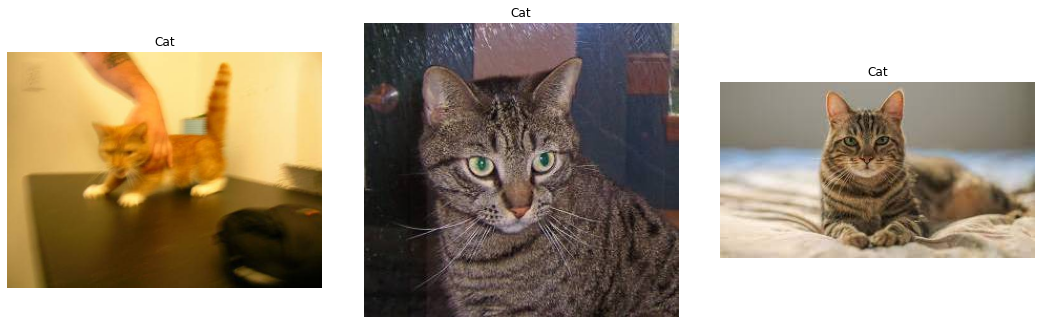

In [4]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax = ax.ravel()
plt.tight_layout()
for i in range(3):
    ax[i].axis('off')
    ax[i].imshow(plt.imread('/Users/dylle/Desktop/MSA/Summer 2021/INFS 778/Transfer Learning/cats_and_dogs_small/train/cats/' + os.listdir(train_cats_dir)[i]))
    ax[i].set_title('Cat')


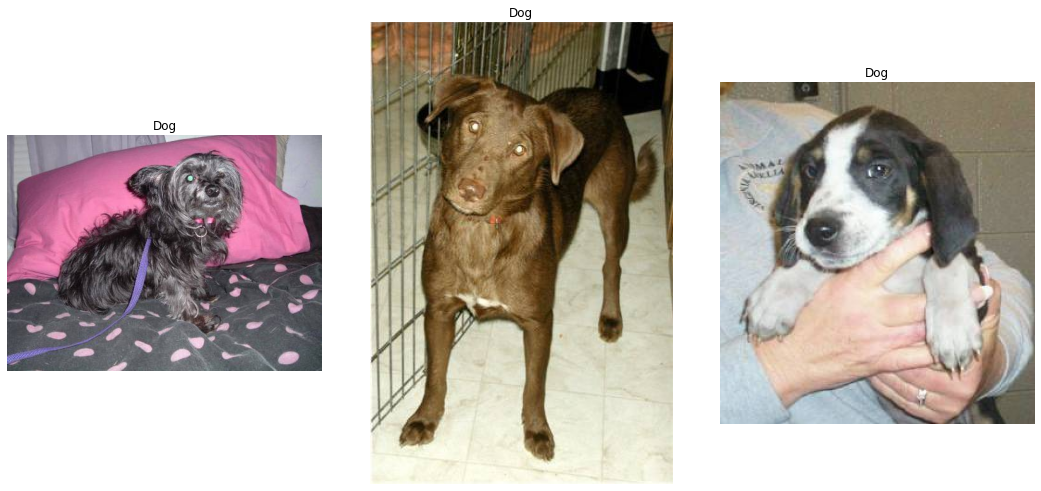

In [5]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax = ax.ravel()
plt.tight_layout()
for i in range(3):
    ax[i].axis('off')
    ax[i].imshow(plt.imread('/Users/dylle/Desktop/MSA/Summer 2021/INFS 778/Transfer Learning/cats_and_dogs_small/train/dogs/' + os.listdir(train_dogs_dir)[i]))
    ax[i].set_title('Dog')

### Building CNN From Scratch

 - Task 1. "Build, train and save a ConvNet model with the dogs-vs-cats dataset; 1). Use model.save_weights()"


Here I am building a convolutional neural network using a Keras Sequential() model in order to be used and trained on the Dogs vs Cats data set.

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), name='conv_1'))
model.add(layers.MaxPooling2D((2, 2), name ='max_1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv_2'))
model.add(layers.MaxPooling2D((2, 2), name = 'max_2'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv_3'))
model.add(layers.MaxPooling2D((2, 2), name= 'max_3'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dropout(0.2, name = 'dropout'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 72, 72, 64)        18496     
_________________________________________________________________
max_2 (MaxPooling2D)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 34, 34, 64)        36928     
_________________________________________________________________
max_3 (MaxPooling2D)         (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

Here we compile the model using binary_crossentropy because it is a binary classification task and we have elected to use the RMSprop optimization algorithm for our training.

In [8]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['accuracy'])

Since our image data is stored in folders found in our current working directory, we are going to implement the ImageDataGenerator() function provided by the Keras API. This function allows us to create a generator that loops through our directory files and pulls our images into the model in batches. While it does this it also applies specified data transformations to the images in order to prepare them for the neural network. One of the nice things about training a CNN from end to end is it allows us to utilize data augmentation which will help us prevent some over fitting which is commonly seen in small data sets like this one. Below we specify which types of augmentation we want to occur to the training data in the training data generator as well as normalize the data by dividing it by 255. Since there are 255 pixels values, this will make sure every image going into our model is a vector of float values between 0 and 1.

In [9]:
# data augmentation helps prevent overfitting with small dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255) # do not augment the test data

val_datagen = ImageDataGenerator(rescale=1./255)

# generates the training images from the folder they are stored
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    color_mode='rgb',
    batch_size=50,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    color_mode='rgb',
    batch_size=50,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    color_mode='rgb',
    batch_size=50,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Here we start the training process by calling the fit() function on our model and our data set. Also, we specify the data we would like to use as the validation data as well as how many validation steps must be taken. This validation steps number is determined by taking the number of validation images we have divided by the batch_size we speicified in our validation data generator. This is an important step because it ensures our model sees all of our validation data. Again, it is important to remember that generator constantly loop or generate data and therefore we must specifically tell them how many loops must be made and of what size to ensure they are performing properly and are constrained.

In [10]:
STEP_SIZE_TRAIN = 2000//50
STEP_SIZE_VALID = 1000//50

history = model.fit(train_generator,
                steps_per_epoch=STEP_SIZE_TRAIN,
                validation_data=val_generator,
                validation_steps=STEP_SIZE_VALID,
                epochs=20
)


Epoch 1/20
40/40 [==============================] - 95s 2s/step - loss: 0.7068 - accuracy: 0.5140 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 2/20
40/40 [==============================] - 98s 2s/step - loss: 0.6898 - accuracy: 0.5295 - val_loss: 0.6715 - val_accuracy: 0.6000
Epoch 3/20
40/40 [==============================] - 110s 3s/step - loss: 0.6692 - accuracy: 0.5915 - val_loss: 0.6637 - val_accuracy: 0.5770
Epoch 4/20
40/40 [==============================] - 109s 3s/step - loss: 0.6600 - accuracy: 0.6130 - val_loss: 0.6424 - val_accuracy: 0.6460
Epoch 5/20
40/40 [==============================] - 106s 3s/step - loss: 0.6500 - accuracy: 0.6250 - val_loss: 0.6330 - val_accuracy: 0.6330
Epoch 6/20
40/40 [==============================] - 106s 3s/step - loss: 0.6484 - accuracy: 0.6165 - val_loss: 0.6198 - val_accuracy: 0.6560
Epoch 7/20
40/40 [==============================] - 116s 3s/step - loss: 0.6351 - accuracy: 0.6260 - val_loss: 0.6335 - val_accuracy: 0.6270
Epoch 8/20
40/4

In [11]:
model.save_weights('cats_dogs_model_weights.h5')

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

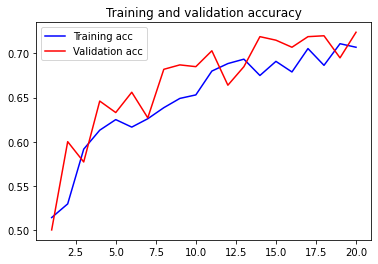

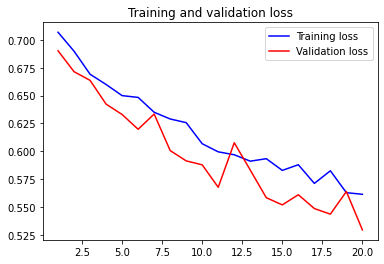

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc', color='blue')
plt.plot(epochs, val_acc, label="Validation acc", color='red')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss', color='blue')
plt.plot(epochs, val_loss, label="Validation loss", color='red')
plt.title('Training and validation loss')
plt.legend()


plt.show()

Alright, so we trained the model for 20 epochs and by taking a look at the validation accuracy, we were able to achieve about 72% classification accuracy on the dogs vs cats data. From looking at the graphs above, it is suggested that we could benefit from running more epochs to allow the model to converge even farther. I have, however, run this experiment once before and in that iteration found that the model did start to overfit the training data a little bit after 20 epochs. Some suggestions to better improve this model would be to fine tune the learning rate and the number of epochs as well as maybe tweek the model architecture. Things like dropout and regularization are effective ways to mitigate overfitting which would allow us to train the model longer and squeeze more classification power from it. Below we can see that when used on a test set, the model performed with 72% accuracy which leaves much room for improvement.

In [14]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 12s 232ms/step - loss: 0.5642 - accuracy: 0.7200
test acc: 0.7200000286102295


#### From scratch CNN weights on Horse vs Human dataset with new densely connected classifier on top

- Task 2. "Load the model (.h5 file, produced by Step 1 above) and use it to classify the test data of Human or Horse data 
    set; 1). Load the weights into a different architecture (with conv layers in common), you can load them by layer 
    name: model.load_weights('my_model_weights.h5', by_name=True), and make sure the names of the conv 
    layers match so that the weights will be loaded into the new model; 2). Freeze the conv layers and train the 
    dense layers. Set layer.trainable as True to make the layer trainable."

Below I build a new model and load the weights of the previous "from scratch CNN" into its convolutional base. I then freeze the convolutional base of this new model with the pretrained weights and then train the entire model, end to end, on the Horse vs Human dataset. The goal is to allow the densely connected classifier on top of the frozen convolutional base to learn new parameters while benfiting from the feature extracation power of the previously trained model.

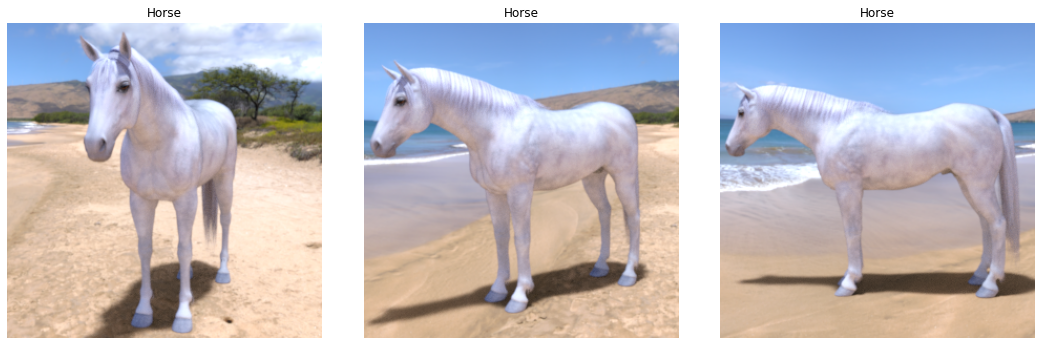

In [15]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax = ax.ravel()
plt.tight_layout()
for i in range(3):
    ax[i].axis('off')
    ax[i].imshow(plt.imread('/Users/dylle/Desktop/MSA/Summer 2021/INFS 778/Transfer Learning/Horse or Human/horse-or-human/horses/' +
                            os.listdir('/Users/dylle/Desktop/MSA/Summer 2021/INFS 778/Transfer Learning/Horse or Human/horse-or-human/horses')[i]))
    ax[i].set_title('Horse')

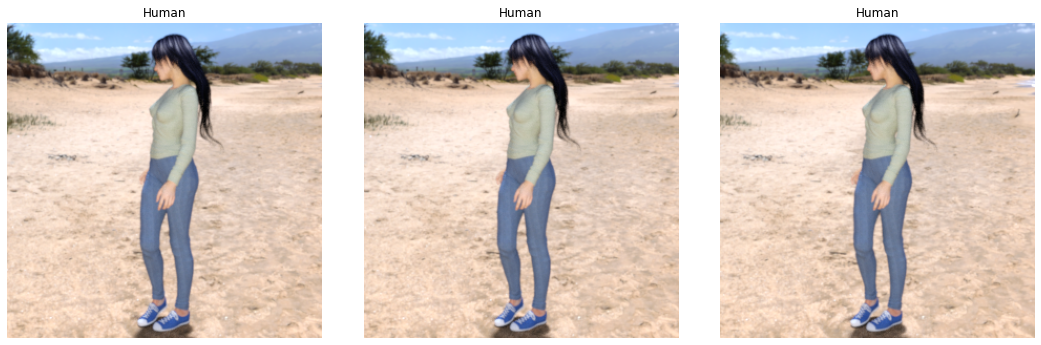

In [16]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax = ax.ravel()
plt.tight_layout()
for i in range(3):
    ax[i].axis('off')
    ax[i].imshow(plt.imread('/Users/dylle/Desktop/MSA/Summer 2021/INFS 778/Transfer Learning/Horse or Human/horse-or-human/humans/' +
                            os.listdir('/Users/dylle/Desktop/MSA/Summer 2021/INFS 778/Transfer Learning/Horse or Human/horse-or-human/humans')[i]))
    ax[i].set_title('Human')

Here we build the architecture for the new model, note it is the same architecture as the first CNN, this is done so that we can load the weights into this model without any issues.

In [17]:
conv_base = models.Sequential()
conv_base.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), name='conv_1'))
conv_base.add(layers.MaxPooling2D((2, 2), name ='max_1'))
conv_base.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv_2'))
conv_base.add(layers.MaxPooling2D((2, 2), name = 'max_2'))
conv_base.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv_3'))
conv_base.add(layers.MaxPooling2D((2, 2), name= 'max_3'))
conv_base.add(layers.Flatten(name='flatten'))
conv_base.add(layers.Dropout(0.2, name = 'dropout'))
conv_base.load_weights('cats_dogs_model_weights.h5', by_name=True)


Here we are taking the convolutional base with the pretrained weights and adding a classifier on top

In [18]:
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 18496)             56320     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               9470464   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 9,527,297
Trainable params: 9,527,297
Non-trainable params: 0
_________________________________________________________________


Here we are freezing the convolutional base so that its parameters can not be changed

In [20]:
# need to freeze the base for initial training
print("number of trainable weights before freezing convolutional base", len(model2.trainable_weights))
conv_base.trainable = False
print("number of trainabe weights after freezing convolutional base", len(model2.trainable_weights))

number of trainable weights before freezing convolutional base 10
number of trainabe weights after freezing convolutional base 4


In [21]:
model2.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=1e-4),
             metrics=['accuracy'])

In [22]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/dylle/Desktop/MSA/Summer 2021/INFS 778/Transfer Learning/train'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/dylle/Desktop/MSA/Summer 2021/INFS 778/Transfer Learning/Horse or Human'


# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'horse-or-human')
validation_dir = os.path.join(base_dir, 'validation-horse-or-human')

# Directory with our training horse pictures
train_horses_dir = os.path.join(train_dir, 'horses')

# Directory with our training human pictures
train_humans_dir = os.path.join(train_dir, 'humans')

# Directory with our validation horse pictures
validation_horses_dir = os.path.join(validation_dir, 'horses')

# Directory with our validation human pictures
validation_humans_dir = os.path.join(validation_dir, 'humans')


In [23]:
# data augmentation helps prevent overfitting with small dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


val_datagen = ImageDataGenerator(rescale=1./255)

# generates the training images from the folder they are stored
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    color_mode='rgb',
    batch_size=50,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [24]:
STEP_SIZE_TRAIN = 1000//50
STEP_SIZE_VALID = 256//32

history = model2.fit(train_generator,
                steps_per_epoch=STEP_SIZE_TRAIN,
                validation_data=val_generator,
                validation_steps=STEP_SIZE_VALID,
                epochs=10
)


Epoch 1/10
20/20 [==============================] - 30s 1s/step - loss: 0.6212 - accuracy: 0.6600 - val_loss: 0.6695 - val_accuracy: 0.5586
Epoch 2/10
20/20 [==============================] - 26s 1s/step - loss: 0.5246 - accuracy: 0.7560 - val_loss: 1.0449 - val_accuracy: 0.5195
Epoch 3/10
20/20 [==============================] - 29s 1s/step - loss: 0.4593 - accuracy: 0.7690 - val_loss: 1.5326 - val_accuracy: 0.5039
Epoch 4/10
20/20 [==============================] - 31s 2s/step - loss: 0.4299 - accuracy: 0.8030 - val_loss: 1.7164 - val_accuracy: 0.5117
Epoch 5/10
20/20 [==============================] - 32s 2s/step - loss: 0.4287 - accuracy: 0.8070 - val_loss: 1.7186 - val_accuracy: 0.5234
Epoch 6/10
20/20 [==============================] - 25s 1s/step - loss: 0.3964 - accuracy: 0.8290 - val_loss: 1.5878 - val_accuracy: 0.5273
Epoch 7/10
20/20 [==============================] - 26s 1s/step - loss: 0.3747 - accuracy: 0.8200 - val_loss: 1.8290 - val_accuracy: 0.5273
Epoch 8/10
20/20 [==

In [25]:
model2.save('cats_dogs_model_weights_Horse_Human.h5')

Here we can see that the convolutional base pretrained on the Cats vs Dogs data set did not perform well on the Horse vs Human data set. There are a few reasons why I believe this occured. For one, when we trained the conv base we didn't train it on that large of a data set. We trained it on a pretty small data set which leads to the model not really having the opportunity to generalize. Also, our first model only have a 72% classification accuracy on the task for which it was trained, thus implying we can't expect it to perform any better than that on a new data set.

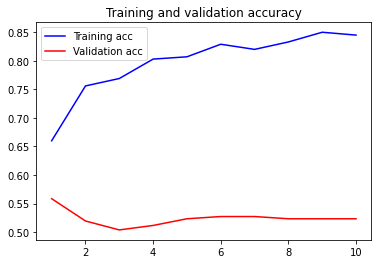

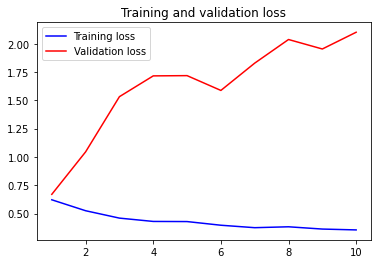

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc', color='blue')
plt.plot(epochs, val_acc, label="Validation acc", color='red')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss', color='blue')
plt.plot(epochs, val_loss, label="Validation loss", color='red')
plt.title('Training and validation loss')
plt.legend()


plt.show()

### Transfer Learning using VGG16

Below we are going to show the power of deep transfer learning when utilizing convolutional bases from models that have been trained on millions of data points with a high classification accuracy allowing them to learn and generalize strong features which can be used in other classification task.

#### First step, use conv base to do feature extraction Horse vs Human data set

The first approach which is available to us is simply using the pretrained convolutional base on the data set as a predictor thus generating a vector of extracted features which can then be fed into a simply 3 layer densley connected neural network for classification. This approach is pretty strong and easily done on a CPU while the "end to end" method is extremely computationally heavy and only easily done or recommended to be done on a GPU.

Here we import the convolutional base of the VGG16 model with the trained weights from the imagenet dataset

In [27]:
conv_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape=(224,224,3)
                 )

In [28]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Here is our function to use the convolutional base to generate feature vectors for out training and validation data sets

In [29]:
datagen = ImageDataGenerator(rescale=1./255)
def extract_features(directory, sample_count, batch_size):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(224, 224),
        color_mode='rgb',
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 1000, 50)
validation_features, validation_labels = extract_features(validation_dir, 256, 32)

Found 1000 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [30]:
train_features = np.reshape(train_features, (1000, 7 * 7 * 512))
validation_features = np.reshape(validation_features, (256, 7 * 7 * 512))

Here is our densely connected classifier that we are going to train using our feature vecors in order to perform classification on the Horse vs Human data

In [31]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=5,
                    batch_size=32,
                    validation_data=(validation_features, validation_labels))

Epoch 1/5
32/32 [==============================] - 5s 158ms/step - loss: 0.3248 - acc: 0.8770 - val_loss: 0.2589 - val_acc: 0.8945
Epoch 2/5
32/32 [==============================] - 5s 156ms/step - loss: 0.0966 - acc: 0.9870 - val_loss: 0.2074 - val_acc: 0.9102
Epoch 3/5
32/32 [==============================] - 5s 152ms/step - loss: 0.0543 - acc: 0.9900 - val_loss: 0.1492 - val_acc: 0.9297
Epoch 4/5
32/32 [==============================] - 5s 149ms/step - loss: 0.0302 - acc: 0.9950 - val_loss: 0.1472 - val_acc: 0.9336
Epoch 5/5
32/32 [==============================] - 5s 151ms/step - loss: 0.0178 - acc: 0.9990 - val_loss: 0.1551 - val_acc: 0.9336


In [32]:
model.save('feature_extraction_VGG16.h5')

As you can see, this model performed significantly better then our own attempt at transfer learning from scratch and we were able to achieve 93% accuracy just by using the convolutional base as a feature extractor. Again, just like every model in this notebook I ran it once before and fine tuned the number of epochs to mitigate overfitting.

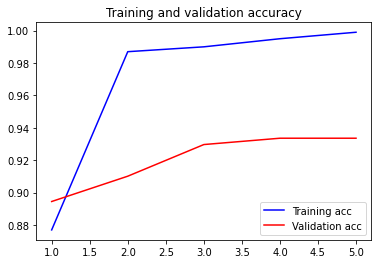

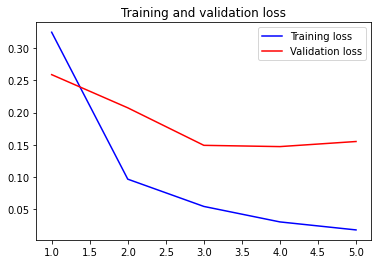

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc', color='blue')
plt.plot(epochs, val_acc, label="Validation acc", color='red')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss', color='blue')
plt.plot(epochs, val_loss, label="Validation loss", color='red')
plt.title('Training and validation loss')
plt.legend()


plt.show()

#### Train new model end to end with frozen base then fine tuning afterwards

Here we are finally implementing the end to end method where we attach our own classifier on top of the convolutional base of the VGG16 model, freeze the convolutional base paramters and then train our entire model end to end with the horse vs human data set. This was done using a CPU for the sake of completing this assignment but I would not recommend this for practical purposes.

In [34]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(256,kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


In [35]:
# need to freeze the base for initial training
print("number of trainable weights before freezing convolutional base", len(model.trainable_weights))
conv_base.trainable = False
print("number of trainabe weights after freezing convolutional base", len(model.trainable_weights))

number of trainable weights before freezing convolutional base 30
number of trainabe weights after freezing convolutional base 4


In [36]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=1e-4),
             metrics=['accuracy'])

In [37]:
# data augmentation helps prevent overfitting with small dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


val_datagen = ImageDataGenerator(rescale=1./255)

# generates the training images from the folder they are stored
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=50,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [38]:
STEP_SIZE_TRAIN = 1000//50
STEP_SIZE_VALID = 256//32

history = model.fit(train_generator,
                steps_per_epoch=STEP_SIZE_TRAIN,
                validation_data=val_generator,
                validation_steps=STEP_SIZE_VALID,
                epochs=5
)

Epoch 1/5
20/20 [==============================] - 719s 36s/step - loss: 5.3483 - accuracy: 0.6970 - val_loss: 4.9355 - val_accuracy: 0.7812
Epoch 2/5
20/20 [==============================] - 737s 37s/step - loss: 4.5378 - accuracy: 0.9030 - val_loss: 4.3447 - val_accuracy: 0.8867
Epoch 3/5
20/20 [==============================] - 767s 38s/step - loss: 4.0492 - accuracy: 0.9360 - val_loss: 3.8179 - val_accuracy: 0.9297
Epoch 4/5
20/20 [==============================] - 688s 34s/step - loss: 3.6118 - accuracy: 0.9570 - val_loss: 3.4821 - val_accuracy: 0.9219
Epoch 5/5
20/20 [==============================] - 695s 35s/step - loss: 3.2430 - accuracy: 0.9720 - val_loss: 3.1660 - val_accuracy: 0.9219


The intial training of the model resulted in a validation accuracy of 92%. The next step is to unfreeze a few of the top layers in the convolutional base in order to fine our model and get a higher level of accuracy out of it. The idea behind fine tuning is that the lower convolutional layers learn general features such as eges, and corners and things like that. The higher level convolutional layers learn features that are much more abstract and task specific such as cat noses or human ears. Therefore, when we use the pretrained convolutional base we might be hindering our classification power slightly by using non-task specific higher level convolutional layers. Thus, we want to unfreeze some of those layers so that they can learn our task and specific abstract features that relate to it. The only issue with this whole idea is that during the back propogation part of learning, when our gradients start to have a large magnitude (something that happens quite often especially in the early stages of learning) the loss function will progogate a large signal back through the network which, in our case since we are using pretrained bases, would completely ruin all of the feature extraction power from the lower layers that we are trying to utilize. The way to stop this from happening is first train the model with all of the convolutional base frozen and then once the model has converged, only unfreeze a few of the top layers, lower the learning rate significantly so that it is really small (lowers the magnitude of the signal sent back through the network) and increase the number of epochs for training. If done properly, the model should ever so slowly and ever so slightly improve and the accuracy should increase.

In [39]:
model.save('TL_VGG16_untuned.h5')

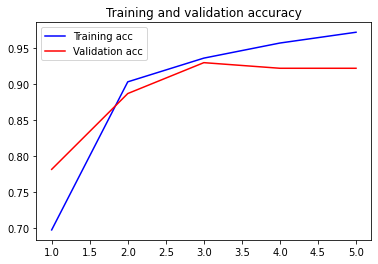

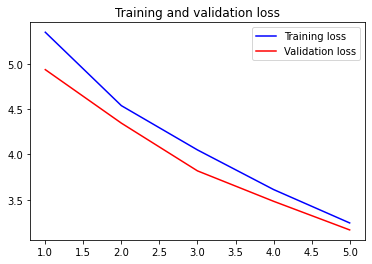

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc', color='blue')
plt.plot(epochs, val_acc, label="Validation acc", color='red')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss', color='blue')
plt.plot(epochs, val_loss, label="Validation loss", color='red')
plt.title('Training and validation loss')
plt.legend()


plt.show()

#### Fine Tuning

Unfreezing a few of the top convolutional layers in the model

In [42]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name in ['block5_conv1', 'block5_conv2', 'block5_conv3']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [43]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=1e-6),
             metrics=['accuracy'])

In [44]:
history = model.fit(train_generator,
                steps_per_epoch=STEP_SIZE_TRAIN,
                validation_data=val_generator,
                validation_steps=STEP_SIZE_VALID,
                epochs=15
)

Epoch 1/15
20/20 [==============================] - 793s 40s/step - loss: 3.0495 - accuracy: 0.9800 - val_loss: 3.1668 - val_accuracy: 0.9180
Epoch 2/15
20/20 [==============================] - 775s 39s/step - loss: 3.0414 - accuracy: 0.9820 - val_loss: 3.1583 - val_accuracy: 0.9180
Epoch 3/15
20/20 [==============================] - 780s 39s/step - loss: 3.0339 - accuracy: 0.9820 - val_loss: 3.1324 - val_accuracy: 0.9336
Epoch 4/15
20/20 [==============================] - 780s 39s/step - loss: 3.0407 - accuracy: 0.9720 - val_loss: 3.1316 - val_accuracy: 0.9336
Epoch 5/15
20/20 [==============================] - 799s 40s/step - loss: 3.0128 - accuracy: 0.9840 - val_loss: 3.1266 - val_accuracy: 0.9336
Epoch 6/15
20/20 [==============================] - 842s 42s/step - loss: 2.9985 - accuracy: 0.9890 - val_loss: 3.1027 - val_accuracy: 0.9336
Epoch 7/15
20/20 [==============================] - 904s 45s/step - loss: 3.0038 - accuracy: 0.9820 - val_loss: 3.0936 - val_accuracy: 0.9375
Epoch 

In [45]:
model.save('TL_VGG16_FineTuned.h5')

Here we can see that we were able to increase the validation accuracy from 92% to 94% by utilizing the fine tuning technique.

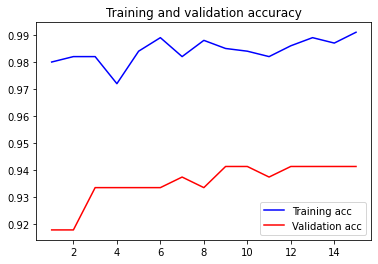

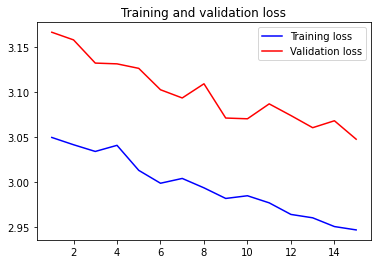

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc', color='blue')
plt.plot(epochs, val_acc, label="Validation acc", color='red')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss', color='blue')
plt.plot(epochs, val_loss, label="Validation loss", color='red')
plt.title('Training and validation loss')
plt.legend()


plt.show()